In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [2]:
# RUTA DE DATASET MS
DATASET_MS = '../dataset/ms/dataset-ms.xlsx'

# CARGA DE DATOS HOJA TRAIN
train_ds = pd.read_excel(DATASET_MS, sheet_name='train')

""" # DIVISION DE DATOS DE ENTRADA (X) Y SALIDA (y)
X = train_ds.iloc[:, :-1] 
y = train_ds.iloc[:, -1]

# EXTRAEMOS EL VALUES DE X E Y PARA CONVERTIRLOS EN NUMPY ARRAY
X = X.values
y = y.values """

' # DIVISION DE DATOS DE ENTRADA (X) Y SALIDA (y)\nX = train_ds.iloc[:, :-1] \ny = train_ds.iloc[:, -1]\n\n# EXTRAEMOS EL VALUES DE X E Y PARA CONVERTIRLOS EN NUMPY ARRAY\nX = X.values\ny = y.values '

In [3]:
# DIVISION DE DATOS DE ENTRADA (X) Y SALIDA (y)
Predictors = ['Cemento','Agua','AgregadoFino','AgregadoGrueso','TiempoCurado']
TargetVariable = ['Carga']

X=train_ds[Predictors].values
y=train_ds[TargetVariable].values

In [4]:
X

array([[407, 239, 858, 860,   1],
       [407, 240, 780, 956,   1],
       [407, 239, 858, 860,   1],
       ...,
       [662, 238, 678, 832,  28],
       [662, 238, 746, 748,  28],
       [662, 238, 678, 832,  28]], dtype=int64)

In [5]:
y

array([[ 4830],
       [ 4770],
       [ 5820],
       [ 3930],
       [ 5990],
       [ 3780],
       [ 4920],
       [ 4740],
       [ 3830],
       [ 5670],
       [ 4820],
       [ 4590],
       [ 4620],
       [ 4620],
       [ 3750],
       [ 4770],
       [ 4910],
       [ 4940],
       [ 5090],
       [ 5670],
       [ 4670],
       [ 4770],
       [ 4990],
       [10700],
       [ 9950],
       [ 8260],
       [10690],
       [ 9690],
       [11780],
       [ 8290],
       [ 8440],
       [ 8420],
       [10780],
       [10730],
       [10880],
       [ 8390],
       [10950],
       [ 9790],
       [ 8340],
       [ 8470],
       [ 9340],
       [ 8570],
       [ 9900],
       [ 9610],
       [ 9870],
       [10050],
       [ 9470],
       [ 9640],
       [10600],
       [11680],
       [10420],
       [12850],
       [13000],
       [10450],
       [10090],
       [10140],
       [10060],
       [10750],
       [10600],
       [10630],
       [ 9750],
       [11500],
       [

In [6]:
# Normalize the input variables
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(235, 5)
(235, 1)
(102, 5)
(102, 1)


In [9]:
model = Sequential()
model.add(Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
 
history = model.fit(X_train, y_train ,batch_size = 20, epochs = 2000, verbose=1, validation_data=(X_test, y_test))

Epoch 1/2000
12/12 [==============================] - 1s 18ms/step - loss: 0.9996 - val_loss: 0.9995
Epoch 2/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.9977 - val_loss: 0.9974
Epoch 3/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.9947 - val_loss: 0.9927
Epoch 4/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.9887 - val_loss: 0.9840
Epoch 5/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.9779 - val_loss: 0.9693
Epoch 6/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.9607 - val_loss: 0.9472
Epoch 7/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.9341 - val_loss: 0.9155
Epoch 8/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.8990 - val_loss: 0.8726
Epoch 9/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.8548 - val_loss: 0.8179
Epoch 10/2000
12/12 [==============================] - 0s 4ms/step - loss: 0.7979 - val_loss: 0.757

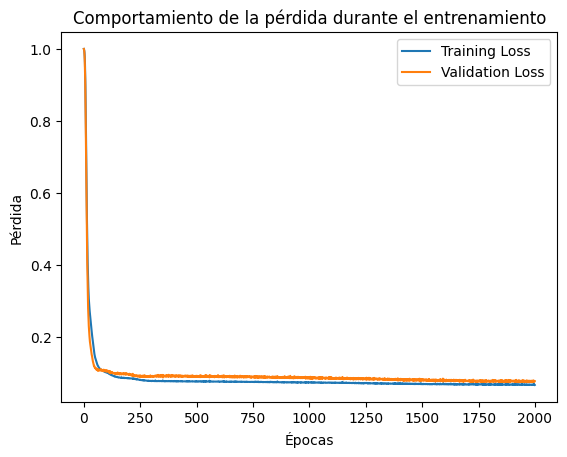

In [10]:
import matplotlib.pyplot as plt

# Mostrar el comportamiento de la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Comportamiento de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [11]:
# Realiza las predicciones con los datos de prueba
predictions = model.predict(X_test[3].reshape(1,-1))

# Invierte la escala de las predicciones a la escala original
predictions = TargetVarScalerFit.inverse_transform(predictions)

# Imprime algunas de las predicciones para ver cómo se comparan con los valores reales
print(predictions)

b = X_test[1].reshape(1,-1) #coge la segunda fila de X_test
c = PredictorScalerFit.inverse_transform(b) #invierte la escala de la segunda fila de X_test

1/1 [==============================] - 0s 96ms/step
[[8251.324]]


In [12]:
c

array([[493., 239., 908., 745.,   7.]])